In [7]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt

system = simplesystem(
     csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    )),
    'paper.systems.china.yaml')
rawdata = system.rawdata

perc_returns = [rawdata.get_daily_percentage_returns(instrument_code).rename(instrument_code) for instrument_code in system.get_instrument_list()]
perc_returns_df = pd.concat(perc_returns, axis=1)

2022-11-18 17:16:45 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-18 17:16:45 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-18 17:16:45 {'type': 'base_system', 'stage': 'config'}  Adding config defaults
2022-11-18 17:16:45 {'type': 'base_system'}  Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2022-11-18 17:16:45 {'type': 'base_system'}  Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2022-11-18 17:16:45 {'type': 'base_system'}  Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']
2022-11-18 17:16:45 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'AG'}  Calculating daily prices for AG
2022-11-18 17:16:46 {'type': 'base_system', 'stage'

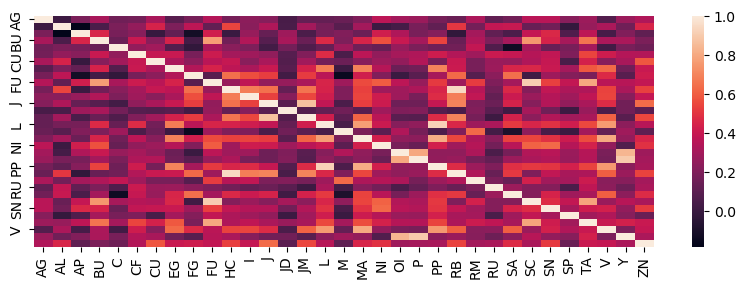

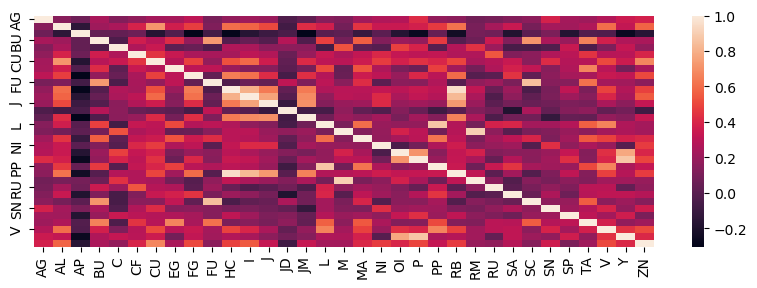

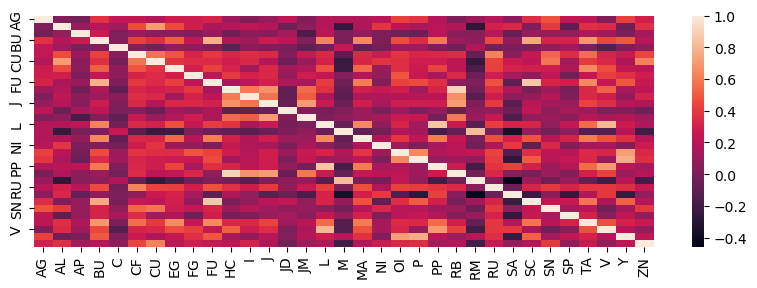

In [15]:
for date in ['2022-06-01', '2021-07-01', '2020-08-01']:
    correlation_matrix = system.portfolio.get_correlation_matrix(pd.Timestamp(date)).as_pd()
    fig, ax = plt.subplots(figsize=(10,3))
    heatmap(correlation_matrix, ax=ax)
    plt.show()